Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# 1. Preparing data for clustering

This dataset contains the postal code-level summary 
of the **2000 United States Census**. It has 7 variables:

ID: Postal code of the region
* a) LOCX: Region longitude
* b) LOCY: Region latitude
* c) MEANHHSZ: Average household size in the region
* d) MEDHHINC: Median household income in the region
* e) REGDENS: Region population density percentile (1=lowest density, 100 = highest density)
* f) REGPOP: Number of people in the region


In [ ]:
df = pd.read_csv("lab3.csv")
df

,ID,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
0,00601,-66.749472,18.180103,70.0,19143,9888,3.24
1,00602,-67.180247,18.363285,83.0,42042,11384,3.10
2,00603,-67.134224,18.448619,86.0,55592,10748,2.84
3,00604,-67.136995,18.498987,83.0,3844,31199,3.00
4,00606,-66.958807,18.182151,65.0,6449,9243,3.20
...,...,...,...,...,...,...,...
33173,99927,-133.606896,56.337957,15.0,136,17143,2.03
33174,99929,-132.338228,56.409507,5.0,2424,43696,2.49
33175,99950,-131.466339,55.875767,2.0,47,37708,2.14
33176,999HH,-132.288850,55.539963,NaN,0,0,0.00


You should have noticed that the **RegDen**s variable is typecasted into the wrong data type. 

In [ ]:
df['RegDens'].describe()
#float data type observed

count    32165.000000
mean        50.500016
std         28.865519
min          1.000000
25%         26.000000
50%         51.000000
75%         75.000000
max        100.000000
Name: RegDens, dtype: float64

You can see that there are a number of empty strings in this variable. 
Replace them with nan and typecast it into the correct float data type.


In [ ]:
df['RegDens'].isna().sum()

1013

In [ ]:
df['RegDens'] = df['RegDens'].replace('', np.nan).astype(float)

Plot the distribution of the variables using distplot.
We will use seaborn and matplotlib for that purpose. 

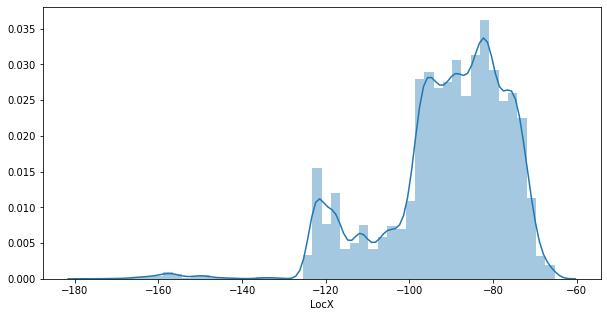

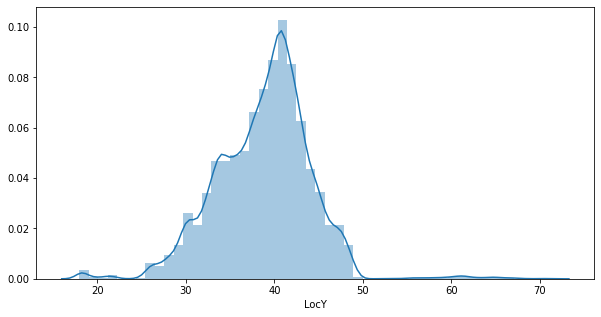

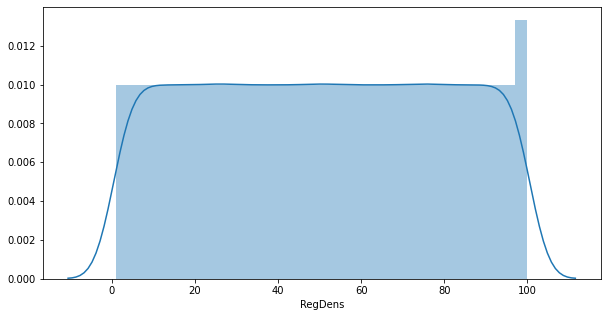

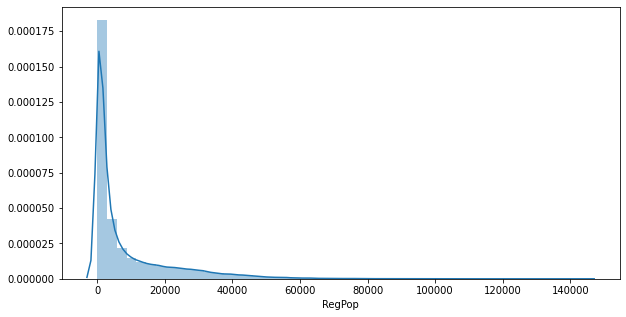

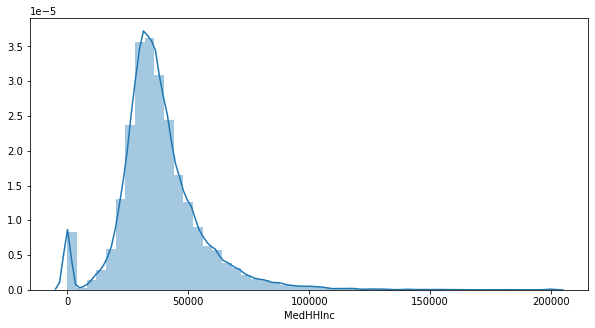

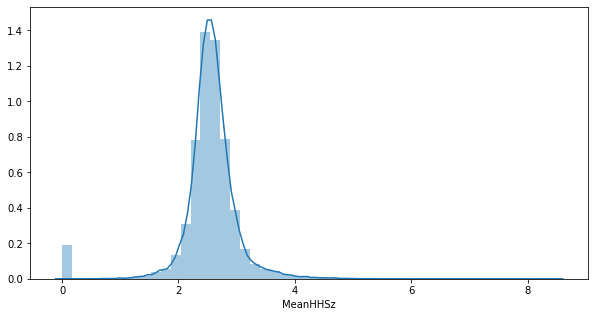

In [ ]:
plt.figure(figsize=(10,5))
a = sns.distplot(df['LocX'])
plt.show()

plt.figure(figsize=(10,5))
b= sns.distplot(df['LocY'])
plt.show()

plt.figure(figsize=(10,5))
c = sns.distplot(df['RegDens'])
plt.show()

plt.figure(figsize=(10,5))
d = sns.distplot(df['RegPop'])
plt.show()

plt.figure(figsize=(10,5))
e = sns.distplot(df['MedHHInc'])
plt.show()

plt.figure(figsize=(10,5))
f = sns.distplot(df['MeanHHSz'])
plt.show()


The last two distplots shows anomalies in MeanHHSz and MedHHInc. 
You will focus on MeanHHSz for now. You could "zoom in" on the distribution by increasing the number of bins.


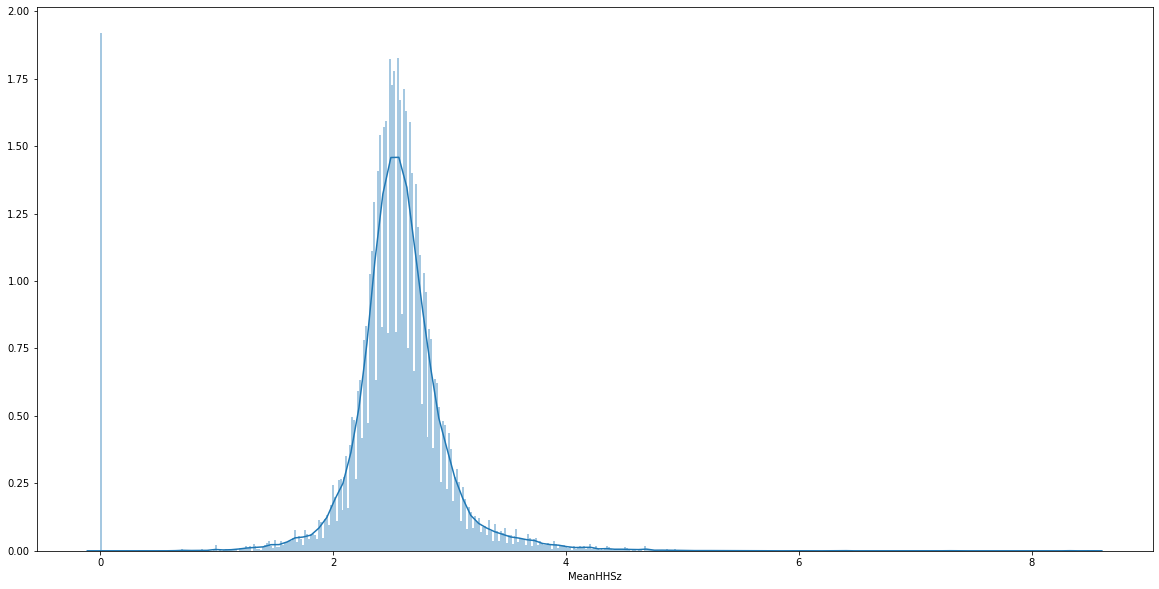

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df['MeanHHSz'], bins=500)


**FacetGrid** shows that errorneous data in MeanHHSz are correlated with errorneous data in other features. This serves as a good reason to eliminate all rows with errorneous MeanHHSz.

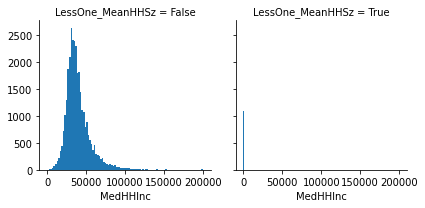

In [ ]:
df['LessOne_MeanHHSz'] = df['MeanHHSz'] < 1

g = sns.FacetGrid(df, col='LessOne_MeanHHSz')
g = g.map(plt.hist, 'MedHHInc', bins=100)

plt.show()

In [ ]:
df = df[df['MeanHHSz'] >= 1]

# 2. Building your first K-means clustering

You will use MedHHInc, MeanHHSz and RegDens and drop the rest of the features.

In [ ]:
df2 = df[['MedHHInc', 'MeanHHSz', 'RegDens']]

In [ ]:
X = df2

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Understanding and Visualising Your Clustering Model

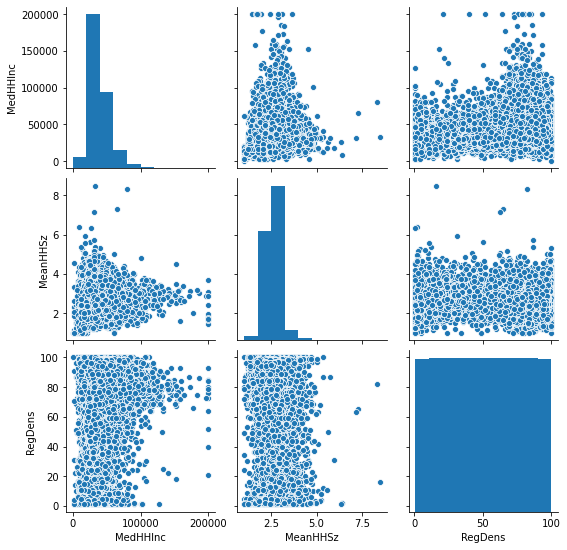

In [ ]:
cluster = sns.pairplot(df2)
plt.show()

In [ ]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=101)
model.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [ ]:
print("Inter Cluster Distance:", model.inertia_)
print("\n Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

y = model.predict(X)
df2['Cluster_ID'] = y

Inter Cluster Distance: 42564.15981990577

 Centroid locations:
[-0.15497497 -0.37699972  0.79864363]
[1.79948954 0.41082353 0.83878434]
[-0.40042315 -0.19054988 -0.89045817]
[-0.33673772  2.30405229  0.22730398]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(df2['Cluster_ID'].value_counts())

2    14543
0    10821
1     4552
3     2163
Name: Cluster_ID, dtype: int64


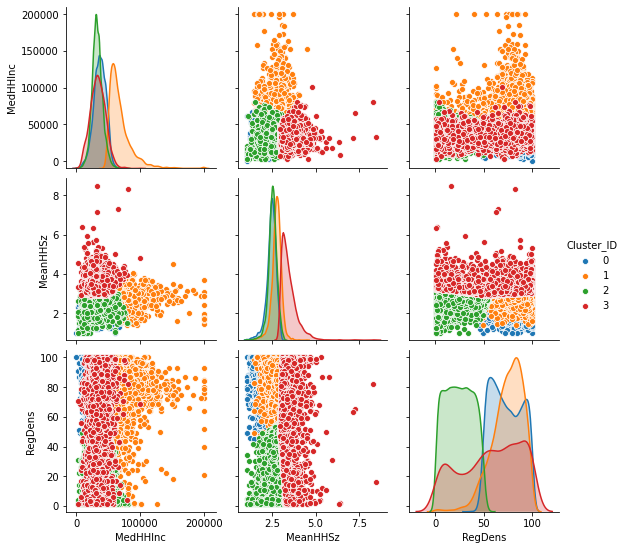

In [ ]:
cluster_g = sns.pairplot(df2, hue='Cluster_ID')
plt.show()


# END OF QUESTION

